In [1]:
!pip3 install --upgrade --user google-cloud-aiplatform umap-learn tqdm pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 46.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
PROJECT = !gcloud config get-value project
PROJECT_ID = PROJECT[0]
LOCATION = "us-west1"

In [2]:
from vertexai.preview.generative_models import GenerativeModel
from vertexai.language_models import TextEmbeddingModel
text_embedding_model = TextEmbeddingModel.from_pretrained("textembedding-gecko@002")
model = GenerativeModel('gemini-pro')

In [3]:
import urllib.request

# download alphabet's annual pdf report
url = "https://abc.xyz/assets/d4/4f/a48b94d548d0b2fdc029a95e8c63"
file = "2022-alphabet-annual-report.pdf"

urllib.request.urlretrieve(f"{url}/{file}", filename=f"{file}")

('2022-alphabet-annual-report.pdf',
 <http.client.HTTPMessage at 0x7ff38f2bf400>)

In [5]:
!pip install PyPDF2
import PyPDF2


# Open the PDF file in binary mode
with open('2022-alphabet-annual-report.pdf', 'rb') as file:
    # Create a PdfFileReader object
    pdf_reader = PyPDF2.PdfReader(file)
    pdf_texts = [p.extract_text().strip() for p in pdf_reader.pages]

    # Filter the empty strings
    pdf_texts = [text for text in pdf_texts if text]

    print(pdf_texts[0])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.4 MB/s eta 0:00:00
To our investors,
2022 was a year full of change and uncertainty around 
the world. In February, when war broke out in Ukraine, our teams worked around-the-clock to make sure our products were helpful to people who needed them, from providing trustworthy information on Search to disrupting cyberattacks to partnering with the government to deploy air raid alerts. In March, I traveled to Warsaw, Poland, where I met Googlers hosting families who sought refuge, talked with entrepreneurs using our office spaces, and saw how our products like Google Translate were helping Ukrainians find a bit of hope and connection.
By late spring, the tech industry was adjusting to a 
more challenging macroeconomic environment, and as a company we embarked on efforts to sharpen our focus and make sure our efforts are aligned with our highest priorities. Near the end of the year, AI reached an inflection point, made possible by 

In [6]:
!pip install langchain sentence-transformers
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter
character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(character_split_texts[10])
print(f"\nTotal chunks: {len(character_split_texts)}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 22.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 965.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 70.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 59.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.6 MB/s

In [7]:
token_splitter = SentenceTransformersTokenTextSplitter(chunk_overlap=0, tokens_per_chunk=256)

token_split_texts = []
for text in character_split_texts:
    token_split_texts += token_splitter.split_text(text)

print(token_split_texts[10])
print(f"\nTotal chunks: {len(token_split_texts)}")

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

5 year in review 2022 multisearch with multisearch, people can now search with both images and text at the same time in google lens.

Total chunks: 511


In [8]:
!pip install chromadb google-generativeai
import chromadb
import os
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
# import chromadb.utils.embedding_functions as embedding_functions

# import getpass
# import os

# getpass will prompt for an API Key
# The API Key is needed for Chroma DB
# API_KEY = getpass.getpass("Provide your Google API Key")

# embedding_function = embedding_functions.GooglePalmEmbeddingFunction(api_key=creds.token)

embedding_function = SentenceTransformerEmbeddingFunction()
print(embedding_function([token_split_texts[10]]))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 59.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.1/679.1 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 74.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[-0.032990410923957825, -0.039943940937519073, 0.027683231979608536, -0.020394684746861458, 0.01031690463423729, -0.013435314409434795, -0.11188779026269913, 0.0020084530115127563, -0.008219867013394833, -0.05463451147079468, 0.05009116232395172, 0.0608343631029129, 0.05028848722577095, 0.040277741849422455, 0.00026212268858216703, -0.0145362988114357, -0.05434255301952362, 0.0022567829582840204, -0.03845824673771858, -0.05322171375155449, 0.05845063552260399, -0.04633062705397606, 0.11275570094585419, -0.0909026563167572, -0.00557461753487587, 0.024509740993380547, -0.14071717858314514, -0.09735379368066788, -0.007698466069996357, 0.018437139689922333, -5.319666161085479e-05, 0.034669168293476105, -0.0063465856947004795, 0.11858687549829483, -0.08441866934299469, 0.05390059947967529, -0.06958919018507004, 0.05044799670577049, -0.010030854493379593, 0.016402781009674072, -0.04245797544717789, -0.036958444863557816, -0.03685654327273369, -0.05933716520667076, 0.031969502568244934, 0.02

In [9]:
chroma_client = chromadb.Client()
print("collection")
chroma_collection = chroma_client.create_collection("alphabet_annual_report_2022", embedding_function=embedding_function)
print("created")
ids = [str(i) for i in range(len(token_split_texts))]
print("adding")
chroma_collection.add(ids=ids, documents=token_split_texts)
chroma_collection.count()

collection
created
adding


511

In [10]:
query = "What was the total revenue?"

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

for document in retrieved_documents:
    print(document)
    print('\n')

accrued revenue share 1, 639 1, 682 ( 445 ) deferred revenue 635 774 367


for additional details, including a reconciliation of the u. s. federal statutory rate to our effective tax rate, see note 14 of the notes to consolidated financial statements included in item 8 of this annual report on form 10 - k. executive overview the following table summarizes our consolidated financial results ( in millions, except for per share information and percentages ) : year ended december 31, 2021 2022 $ change % change consolidated revenues $ 257, 637 $ 282, 836 $ 25, 199 10 % change in consolidated constant currency revenues ( 1 ) 14 % cost of revenues $ 110, 939 $ 126, 203 $ 15, 264 14 % operating expenses $ 67, 984 $ 81, 791 $ 13, 807 20 % operating income $ 78, 714 $ 74, 842 $ ( 3, 872 ) ( 5 ) % operating margin 31 % 26 % ( 5 ) % other income ( expense ), net $ 12, 020 $ ( 3, 514 ) $ ( 15, 534 ) ( 129 ) % net income $ 76, 033 $ 59, 972 $ ( 16, 061 ) ( 21 ) % diluted eps $ 5. 61 $ 4. 56 $ ( 1. 

In [11]:
def rag(query, retrieved_documents, model):
    information = "\n\n".join(retrieved_documents)

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'Your users are asking questions about information contained in an annual report.\n'
    f'You will be shown the user\'s question, and the relevant information from the annual report.\n'
    f'Answer the user\'s question using only this information.\n\n'
    f'Question: {query}. \n Information: {information}')
    
    responses = model.generate_content(prompt, stream=False)
    return responses.text

response = rag(query=query, retrieved_documents=retrieved_documents, model=model)
print(response)

The company's consolidated revenue for the year ended December 31, 2022 was $282,836 million. This represents a 10% increase from the $257,637 million in consolidated revenue reported for the year ended December 31, 2021. 


In [12]:
import umap.umap_ as umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings

projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

/root/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
100% 511/511 [11:25<00:00,  1.34s/it]


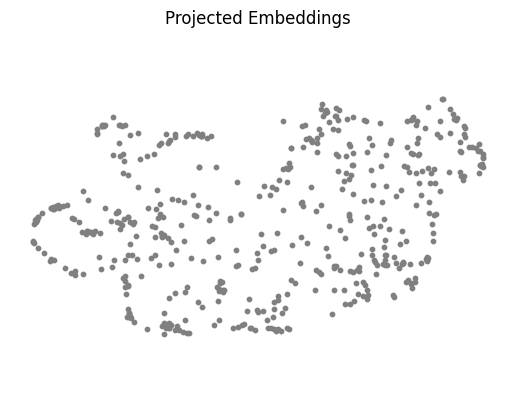

In [13]:
import matplotlib.pyplot as plt

def plot(title='Projected Embeddings', projected_dataset_embeddings=[], projected_query_embedding=[], projected_retrieved_embeddings=[]):
    # Plot the projected query and retrieved documents in the embedding space
    plt.figure()
    plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
    if len(projected_query_embedding) > 0:
        plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
    if len(projected_retrieved_embeddings) > 0:
        plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'{title}')
    plt.axis('off')

plot(projected_dataset_embeddings=projected_dataset_embeddings)

In [14]:
query = "What was the total revenue?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

accrued revenue share 1, 639 1, 682 ( 445 ) deferred revenue 635 774 367

for additional details, including a reconciliation of the u. s. federal statutory rate to our effective tax rate, see note 14 of the notes to consolidated financial statements included in item 8 of this annual report on form 10 - k. executive overview the following table summarizes our consolidated financial results ( in millions, except for per share information and percentages ) : year ended december 31, 2021 2022 $ change % change consolidated revenues $ 257, 637 $ 282, 836 $ 25, 199 10 % change in consolidated constant currency revenues ( 1 ) 14 % cost of revenues $ 110, 939 $ 126, 203 $ 15, 264 14 % operating expenses $ 67, 984 $ 81, 791 $ 13, 807 20 % operating income $ 78, 714 $ 74, 842 $ ( 3, 872 ) ( 5 ) % operating margin 31 % 26 % ( 5 ) % other income ( expense ), net $ 12, 020 $ ( 3, 514 ) $ ( 15, 534 ) ( 129 ) % net income $ 76, 033 $ 59, 972 $ ( 16, 061 ) ( 21 ) % diluted eps $ 5. 61 $ 4. 56 $ ( 1. 0

In [15]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100% 1/1 [00:01<00:00,  1.15s/it]
100% 5/5 [00:06<00:00,  1.30s/it]


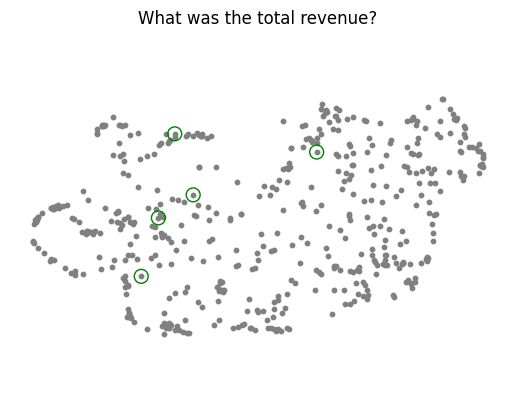

In [16]:
plot(title=query, projected_dataset_embeddings=projected_dataset_embeddings, projected_query_embedding=[], projected_retrieved_embeddings=projected_retrieved_embeddings)

In [17]:
query = "What is the strategy around artificial intelligence (AI) ?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

to irrelevance over time, especially in technology, where change tends to be revolutionary, not evolutionary. people thought we were crazy when we acquired youtube and android and when we launched chrome, but those efforts have matured into major platforms for digital video and mobile devices and a safer, popular browser. we continue to look toward the future and to invest for the long term within each of our segments. as we said in the original founders ’ letter, we will not shy away from high - risk, high - reward projects that we believe in, as they are the key to our long - term success. the power of ai we believe that ai is a foundational and transformational technology that will provide compelling and helpful benefits to people and society through its capacity to assist, complement, empower, and inspire people in almost every field of human endeavor. as

are making across our businesses, such as in ai, reflect our ongoing efforts to innovate and provide products and services that

In [18]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100% 1/1 [00:01<00:00,  1.52s/it]
100% 5/5 [00:06<00:00,  1.29s/it]


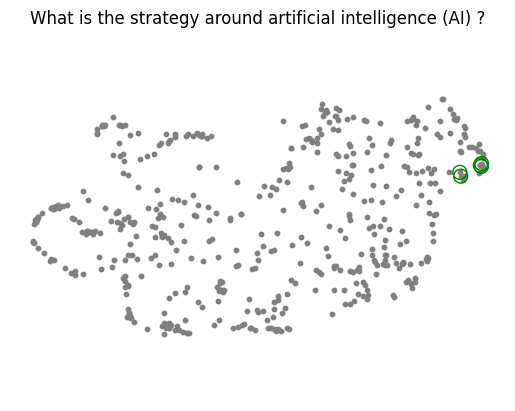

In [19]:
plot(title=query, projected_dataset_embeddings=projected_dataset_embeddings, projected_query_embedding=[], projected_retrieved_embeddings=projected_retrieved_embeddings)

our operating results have fluctuated, and may in the future fluctuate, as a result of a number of factors, many outside of our control, including the cyclicality and seasonality in our business and geopolitical events. as a result, comparing our operating results ( including our expenses as a percentage of our revenues ) on a period - to - period basis may not be meaningful, and our past results should not be relied on as an indication of our future performance. consequently, our operating results in future quarters may fall below expectations. acquisitions, joint ventures, investments, and divestitures could result in operating difficulties, dilution, and other consequences that could harm our business, financial condition, and operating results. acquisitions, joint ventures, investments, and divestitures are important elements of our overall corporate strategy and use of capital,

customer contracts with commitments for performance obligations, including our estimate of the remainin

100% 1/1 [00:01<00:00,  1.58s/it]
100% 5/5 [00:07<00:00,  1.57s/it]


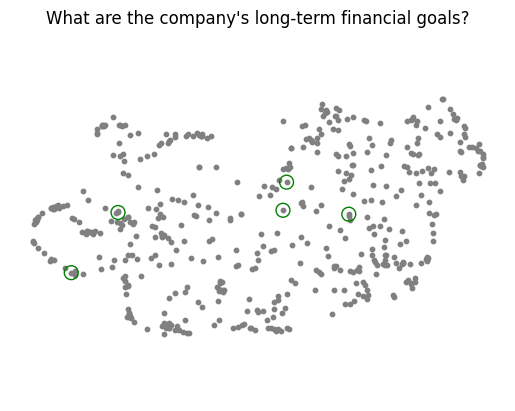

In [20]:
query = "What are the company's long-term financial goals?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

plot(title=query, projected_dataset_embeddings=projected_dataset_embeddings, projected_query_embedding=[], projected_retrieved_embeddings=projected_retrieved_embeddings)

other bets 753 1, 068 hedging gains ( losses ) 149 1, 960 total revenues $ 257, 637 $ 282, 836

we continue to make significant research and development investments in areas of strategic focus as we seek to develop new, innovative offerings and improve our existing offerings across our businesses. we also expect to continue to invest in our technical infrastructure, including servers, network equipment, and data centers, to support the growth of our business and our long - term initiatives, in particular in support of ai. in addition acquisitions and strategic investments contribute to the breadth and depth of our offerings, expand our expertise in engineering and other functional areas, and build strong partnerships around strategic initiatives. for example, in september 2022 we closed the acquisition of mandiant to help expand our offerings in dynamic cyber defense and response. zwe face continuing changes in regulatory conditions, laws, and public policies, which could affect our bu

100% 1/1 [00:03<00:00,  3.14s/it]
100% 5/5 [00:14<00:00,  2.88s/it]


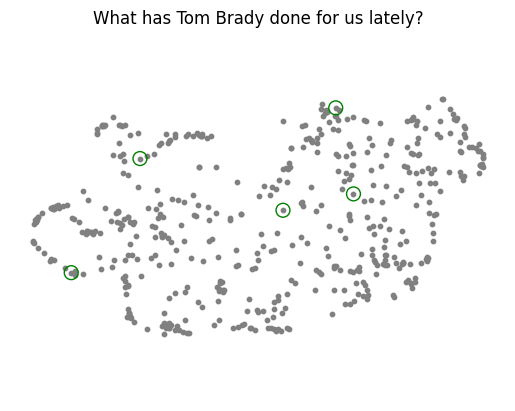

In [21]:
query = "What has Tom Brady done for us lately?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

plot(title=query, projected_dataset_embeddings=projected_dataset_embeddings, projected_query_embedding=[], projected_retrieved_embeddings=projected_retrieved_embeddings)

In [22]:
def augment_query_generated(query, model):
    information = "\n\n".join(retrieved_documents)

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'Provide an example answer to the given question, that might be found in a document like an annual report.\n'
    f'Question: {query}.')
    
    responses = model.generate_content(prompt, stream=False)
    return responses.text

original_query = "Was there significant turnover in the executive team?"
hypothetical_answer = augment_query_generated(original_query, model)

joint_query = f"{original_query} {hypothetical_answer}"
print(joint_query)

Was there significant turnover in the executive team? ## Executive Team Turnover

There was **no significant turnover** in the executive team during the fiscal year. The team remained stable, with all members continuing in their roles throughout the year. This stability has contributed to the company's strong performance and allowed for continued execution of long-term strategic initiatives. 

The Board of Directors believes that having a stable and experienced leadership team is critical to the company's success. The executive team has a deep understanding of the company's business, industry, and competitive landscape. They are also well-positioned to navigate the challenges and opportunities that lie ahead.

The Board is confident that the executive team will continue to lead the company to success in the years to come. 



In [23]:
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results['documents'][0]

for doc in retrieved_documents:
    print(doc)
    print('')

we rely on highly skilled personnel and, if we are unable to retain or motivate key personnel, hire qualified personnel, or maintain and continue to adapt our corporate culture, we may not be able to grow or operate effectively. our performance largely depends on the talents and efforts of highly skilled individuals. our ability to compete effectively and our

and other strategic transactions may not materialize. in connection with our divestitures, we have agreed, and may in the future agree, to provide indemnification for certain potential liabilities, which could harm our financial condition and operating results. if we were to lose the services of key personnel, we may not be able to execute our business strategy. our future success depends in large part upon the continued service of key members of our senior management team. for instance, sundar pichai is critical to the overall management of alphabet and its subsidiaries and plays an important role in the development of our techn

In [ ]:
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results['documents'][0]

for doc in retrieved_documents:
    print(doc)
    print('')

In [24]:
retrieved_embeddings = results['embeddings'][0]
original_query_embedding = embedding_function([original_query])
augmented_query_embedding = embedding_function([joint_query])

projected_original_query_embedding = project_embeddings(original_query_embedding, umap_transform)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100% 1/1 [00:01<00:00,  1.13s/it]
100% 1/1 [00:01<00:00,  1.18s/it]
100% 5/5 [00:06<00:00,  1.36s/it]


(-1.5363173604011537, 9.505607855319976, 1.5967622697353363, 7.356301099061966)

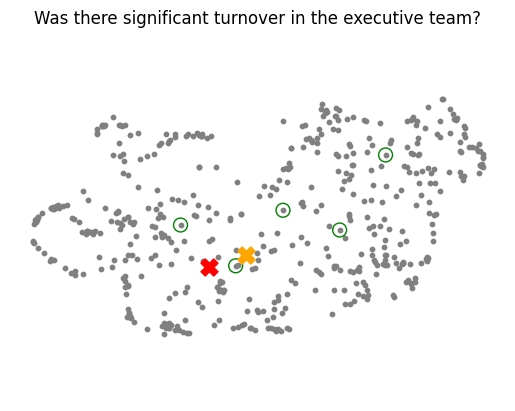

In [25]:
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')

In [26]:
def augment_multiple_query(query, model):
    information = "\n\n".join(retrieved_documents)

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'Your users are asking questions about an annual report.\n'
    f'Suggest up to five additional related questions to help them find the information they need, for the provided question.\n'
    f'Suggest only short questions without compound sentences. Suggest a variety of questions that cover different aspects of the topic.\n'
    f'Make sure they are complete questions, and that they are related to the original question.\n'
    f'Output one question per line. Do not number the questions.\n'
    f'Question: {query}.')
    
    responses = model.generate_content(prompt, stream=False)
    return responses.text

original_query = "What were the most important factors that contributed to increases in revenue?"
augmented_queries = augment_multiple_query(original_query, model)

joint_query = f"{original_query} \n{augmented_queries}"
print(joint_query)

What were the most important factors that contributed to increases in revenue? 
What were the contributions of each product or service to the revenue increase?
How did geographic expansion contribute to the revenue growth?
Did changes in pricing strategy impact revenue?
How much did acquisitions contribute to the revenue increase?
To what extent did organic growth contribute to the revenue increase?


In [27]:
queries = [original_query] + augmented_queries.split('\n')
results = chroma_collection.query(query_texts=queries, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents']

# Deduplicate the retrieved documents
unique_documents = set()
for documents in retrieved_documents:
    for document in documents:
        unique_documents.add(document)

for i, documents in enumerate(retrieved_documents):
    print(f"Query: {queries[i]}")
    print('')
    print("Results:")
    for doc in documents:
        print(doc)
        print('')
    print('-'*100)

Query: What were the most important factors that contributed to increases in revenue?

Results:
. due to these factors and the evolving nature of our business, our historical revenue growth rate and historical operating margin may not be indicative of our future performance. for additional information, see trends in our business and financial effect and revenues and monetization metrics in part ii, item 7 of this annual report on form 10 - k.

our revenue growth rate could decline over time, and we anticipate downward pressure on our operating margin in the future. our revenue growth rate could decline over time as a result of a number of factors, including changes in the devices and modalities used to access our products and services ; changes in geographic mix ; deceleration or declines in advertiser spending ; competition ; customer usage and demand for our products ; decreases in our pricing of our products and services ; ongoing product and policy changes ; and shifts to lower pri

In [ ]:
original_query_embedding = embedding_function([original_query])
augmented_query_embeddings = embedding_function(augmented_queries)

project_original_query = project_embeddings(original_query_embedding, umap_transform)
project_augmented_queries = project_embeddings(augmented_query_embeddings, umap_transform)

100% 1/1 [00:01<00:00,  1.13s/it]
 87% 281/322 [06:24<00:54,  1.33s/it]

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(project_augmented_queries[:, 0], project_augmented_queries[:, 1], s=150, marker='X', color='orange')
plt.scatter(projected_result_embeddings[:, 0], projected_result_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(project_original_query[:, 0], project_original_query[:, 1], s=150, marker='X', color='r')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')

In [ ]:
from sentence_transformers import CrossEncoder
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

In [ ]:
pairs = []
for doc in unique_documents:
    pairs.append([original_query, doc])

In [ ]:
scores = cross_encoder.predict(pairs)

print("Scores:")
for score in scores:
    print(score)

In [ ]:
print("New Ordering:")
ranked_docs=['']*len(scores)
i = 0
for position in np.argsort(scores)[::-1]:
    ranked_docs[position] = pairs[i][1]
    i+=1
    print(position)

In [ ]:
ranked_docs[:5]

In [ ]:
response = rag(query=original_query, retrieved_documents=ranked_docs[:5], model=model)
print(original_query)
print(response)

In [ ]:
def generate_queries(model):

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'You help users analyze financial statements to better understand companies.\n'
    f'Suggest 10 to 15 short questions that are important to ask when analyzing an annual report.\n'
    f'Do not output any compound questions (questions with multiple sentences or conjunctions).\n'
    f'Output each question on a separate line divided by a newline.')
    
    responses = model.generate_content(prompt, stream=False)
    return responses.text.split('\n')

generated_queries = generate_queries(model)
for query in generated_queries:
    print(query)

In [ ]:
results = chroma_collection.query(query_texts=generated_queries, n_results=10, include=['documents', 'embeddings'])
retrieved_documents = results['documents']

In [ ]:
def evaluate_results(query, statement, model):

    prompt = (f'You are a helpful expert financial research assistant.\n'
    f'You help users analyze financial statements to better understand companies.\n'
    f'For the given query, evaluate whether the following satement is relevant.\n'
    f'Output only \'yes\' or \'no\'.\n'
    f'Question: {query}, Statement: {statement}.')
    
    responses = model.generate_content(prompt, stream=False)
    if responses.text == 'yes':
        return 1
    return -1

retrieved_embeddings = results['embeddings']
query_embeddings = embedding_function(generated_queries)

In [ ]:
adapter_query_embeddings = []
adapter_doc_embeddings = []
adapter_labels = []

for q, query in enumerate(tqdm(generated_queries)):
    for d, document in enumerate(retrieved_documents[q]):
        adapter_query_embeddings.append(query_embeddings[q])
        adapter_doc_embeddings.append(retrieved_embeddings[q][d])
        adapter_labels.append(evaluate_results(query, document, model))

len(adapter_labels)

In [ ]:
!pip install torch

import torch

In [ ]:
adapter_query_embeddings = torch.Tensor(np.array(adapter_query_embeddings))
adapter_doc_embeddings = torch.Tensor(np.array(adapter_doc_embeddings))
adapter_labels = torch.Tensor(np.expand_dims(np.array(adapter_labels),1))

dataset = torch.utils.data.TensorDataset(adapter_query_embeddings, adapter_doc_embeddings, adapter_labels)

In [ ]:
def model(query_embedding, document_embedding, adaptor_matrix):
    updated_query_embedding = torch.matmul(adaptor_matrix, query_embedding)
    return torch.cosine_similarity(updated_query_embedding, document_embedding, dim=0)

In [ ]:
def mse_loss(query_embedding, document_embedding, adaptor_matrix, label):
    return torch.nn.MSELoss()(model(query_embedding, document_embedding, adaptor_matrix), label)

In [ ]:
mat_size = len(adapter_query_embeddings[0])
adapter_matrix = torch.randn(mat_size, mat_size, requires_grad=True)

In [ ]:
min_loss = float('inf')
best_matrix = None

for epoch in tqdm(range(100)):
    for query_embedding, document_embedding, label in dataset:
        loss = mse_loss(query_embedding, document_embedding, adapter_matrix, label)

        if loss < min_loss:
            min_loss = loss
            best_matrix = adapter_matrix.clone().detach().numpy()

        loss.backward()
        with torch.no_grad():
            adapter_matrix -= 0.01 * adapter_matrix.grad
            adapter_matrix.grad.zero_()       

In [ ]:
print(f"Best loss: {min_loss.detach().numpy()}")

In [ ]:
test_vector = torch.ones((mat_size,1))
scaled_vector = np.matmul(best_matrix, test_vector).numpy()

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(len(scaled_vector)), scaled_vector.flatten())
plt.show()

In [ ]:
query_embeddings = embedding_function(generated_queries)
adapted_query_embeddings = np.matmul(best_matrix, np.array(query_embeddings).T).T

projected_query_embeddings = project_embeddings(query_embeddings, umap_transform)
projected_adapted_query_embeddings = project_embeddings(adapted_query_embeddings, umap_transform)

In [ ]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embeddings[:, 0], projected_query_embeddings[:, 1], s=150, marker='X', color='r', label="original")
plt.scatter(projected_adapted_query_embeddings[:, 0], projected_adapted_query_embeddings[:, 1], s=150, marker='X', color='green', label="adapted")

plt.gca().set_aspect('equal', 'datalim')
plt.title("Adapted Queries")
plt.axis('off')
plt.legend()